# Imports:

In [145]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr, ttest_ind
from os.path import join, sep
import Config as c
valid_users = c.valid_users
data_path = c.data_path
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Read Data:

In [2]:
clinic_df = pd.read_pickle(join(c.data_path, 'clinic_processed_pickle.p'))
home_df = pd.read_pickle(join(c.data_path, 'home_processed_pickle.p'))
reminders_df = pd.read_pickle(join(c.data_path, 'reminder_five_minutes_processed_pickle.p'))

# Set some important variables + define summary function:

In [3]:
clinic_patients_reports = clinic_df.patient_report_value
clinic_clinicians_reports = clinic_df.clinician_report_value
home_patients_reports = home_df.patient_report_value
reminders_patients_reports = reminders_df.patient_report_value

In [7]:
statistics = ['median', 'mean', np.std]
min_val = c.report_values[0]
max_val = c.report_values[-1]

In [150]:
def plot_statistics_distribution(df, assessment_id, user_id, target_variable,
                                 statistics, min_val=min_val, max_val=max_val):
    print('\nNumber of assessments per user in this dataset:')
    print(df[[user_id, assessment_id]].groupby(user_id)[assessment_id].nunique(), '\n')
    grouped_reports = df[[assessment_id, user_id, target_variable]].groupby(assessment_id, as_index=False).agg('mean')
    reports = grouped_reports[target_variable].astype(int)
    # Count report appearances for each possible value (even if didn't appear):
    counts = []
    for x in c.report_values:
        x_count = len([r for r in reports if r==x])
        counts.append(x_count)
    # Plot:    
    fig, ax = plt.subplots()
    ax.bar(c.report_values, counts, width=0.4, align='center')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title('Histogram of %s across all records:' % (target_variable))
    ax.set_xlabel('Reported Chorea')
    ax.set_ylabel('Count')
    plt.show()

    
    # Aggregate (mean, std, median) per patient, and plot all into one graph:
    print('\n')
    per_user_stats = grouped_reports[[user_id, target_variable]].groupby(user_id, as_index=False).agg(statistics)
    per_user_stats.columns = per_user_stats.columns.droplevel(0)
    per_user_stats.reset_index(inplace=True)
    
    n_users = per_user_stats.shape[0]
    x_locs = np.arange(1, n_users+1)
    width = 0.3
    fig = plt.figure(2)
    ax = fig.add_subplot(111)
    means = per_user_stats['mean']
    stds = per_user_stats['std']
    medians = per_user_stats['median']

    rects1 = ax.bar(x_locs, means, width, color='g', yerr=stds)
    rects2 = ax.bar(x_locs+width, medians, width, color='b')
    
    ax.set_title('Summary statistics per patient')
    ax.set_ylabel('Reported Chorea')
    ax.set_xlabel('Patient ID')
    ax.set_xticks(x_locs+(0.5*width))
    ax.set_xticklabels(per_user_stats['user_id'].astype(str))
    ax.legend((rects1[0], rects2[0]), ('Mean', 'Median'))
    plt.show()
    
    
    # Calculate the fraction of 'positive' reports per patient, and plot:
    print('\n')
    grouped_reports['binary_report'] = grouped_reports[target_variable]>=1
    binary_avg = grouped_reports[[user_id, 'binary_report']].groupby(user_id, as_index=False).agg('mean')
    binary_avg['user_id'] = binary_avg['user_id'].astype(str)

    plt.figure(3)
    plt.bar(x_locs, binary_avg['binary_report'])
    plt.xticks(x_locs, binary_avg['user_id'])
    plt.title('Fraction of positive (>1) reports per patient')
    plt.xlabel('Patient ID')
    plt.ylabel('Fraction of positive reports')
    plt.show()
    
    return

In [118]:
def old_plot_statistics_distribution(df, assessment_identifier, grouping_identifier, target_variable,
                                 statistics, min_val=0, max_val=4):
    print('\nNumber of assessments per user in this dataset:')
    print(df[[grouping_identifier, assessment_identifier]].groupby(grouping_identifier)[assessment_identifier].nunique())
    hist_range = (min_val, max_val)
    ticks = range(min_val, max_val+1)
    grouped_reports = df[[assessment_identifier, target_variable]].groupby(assessment_identifier).agg('mean')
    print('\nHistogram of %s across all records:' % (target_variable))
    plt.hist(grouped_reports[target_variable], range=hist_range)
    plt.show()
    for stat in statistics:
        agg_df = df[[grouping_identifier, target_variable]].groupby(grouping_identifier, as_index=False).agg(stat)
        if stat==np.std:
            stat = 'standard deviation'
        agg_df.columns = [grouping_identifier, stat]
        stat_vals = agg_df[stat]
        print('\n', target_variable, 'per-patient %s distribution:' % (stat))
        if stat!=np.std:
            hist_range = hist_range
        plt.hist(stat_vals, range=hist_range)
        plt.show()
    df['binary_report'] = df[target_variable]>=1
    binary_avg = df[[grouping_identifier, 'binary_report']].groupby(grouping_identifier, as_index=False).agg('mean')
    print('\n Per-patient fraction of positive reports distribution:')
    plt.hist(binary_avg['binary_report'])
    plt.show()

## Inspect patients' reports for lab assessments:


Number of assessments per user in this dataset:
user_id
25     2
45     1
51     1
57     1
63     1
74     1
82     1
94     1
108    1
Name: assessment_id, dtype: int64 



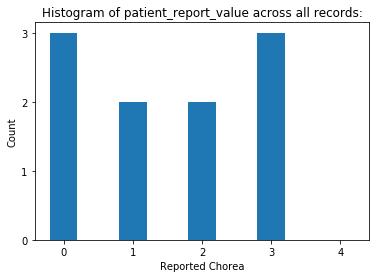

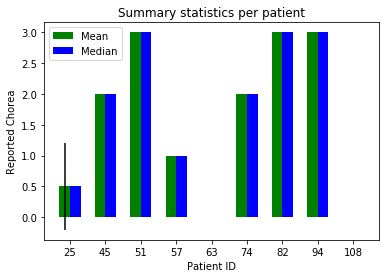

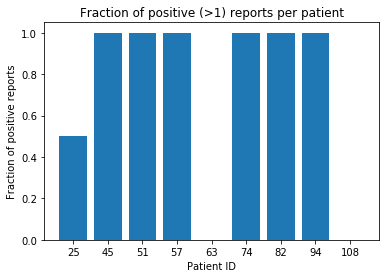

In [152]:
plot_statistics_distribution(clinic_df, assessment_id='assessment_id',
                             user_id ='user_id',
                             target_variable='patient_report_value', statistics=statistics)

## Inspect clinicians' reports for lab assessments:


Number of assessments per user in this dataset:
user_id
25     2
45     1
51     1
57     1
63     1
74     1
82     1
94     1
108    1
Name: assessment_id, dtype: int64 



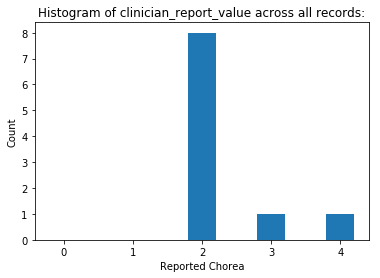

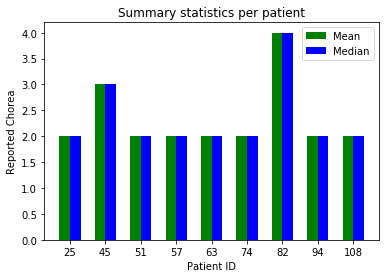

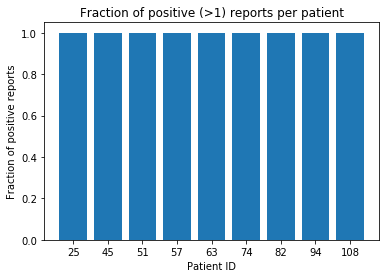

In [153]:
plot_statistics_distribution(clinic_df, assessment_id='assessment_id',
                             user_id ='user_id',
                             target_variable='clinician_report_value', statistics=statistics)

## Inspect patients' reports for home assessments:


Number of assessments per user in this dataset:
user_id
8       25
25      30
45      56
51      65
57      99
63      12
74     134
82      34
94       8
108     37
Name: assessment_id, dtype: int64 



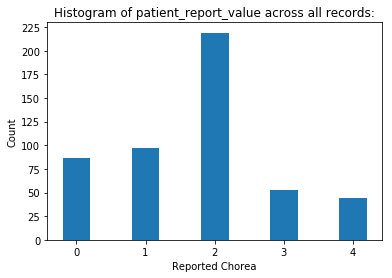

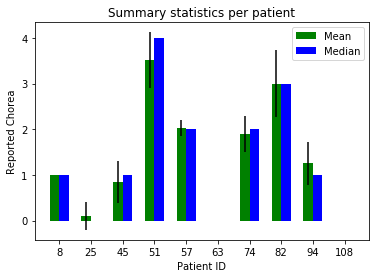

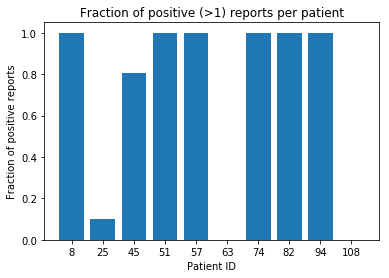

In [154]:
plot_statistics_distribution(home_df, assessment_id='assessment_id',
                             user_id ='user_id',
                             target_variable='patient_report_value', statistics=statistics)

## Inspect patients' reports for pre-reminder 5-minutes segments:


Number of assessments per user in this dataset:
user_id
8       48
45       6
51      35
57     305
63      28
74     204
82      73
94      18
108     78
Name: reminder_id, dtype: int64 



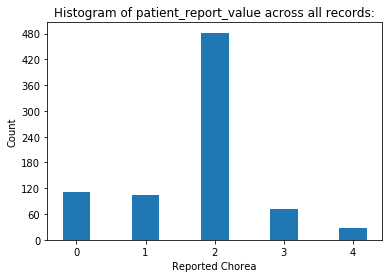

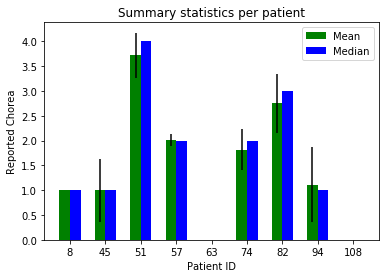

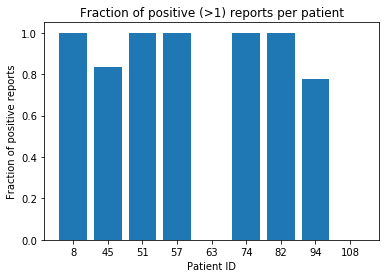

In [156]:
plot_statistics_distribution(reminders_df, assessment_id='reminder_id',
                             user_id ='user_id',
                             target_variable='patient_report_value', statistics=statistics)

## Lab data: patients' reports vs. clinicians' reports:

   assessment_id  patient_report_value  clinician_report_value
0  1481923232988                   1.0                     2.0
1  1485546321147                   2.0                     2.0
2  1487605701264                   1.0                     2.0
3  1488396181636                   0.0                     2.0
4  1489765988342                   3.0                     4.0
5  1490284781631                   3.0                     2.0
6  1490637319938                   2.0                     3.0
7  1493741957038                   3.0                     2.0
8  1493912424448                   0.0                     2.0
9  1493920652116                   0.0                     2.0

Correlation of: 0.454 
p-value of: 0.188


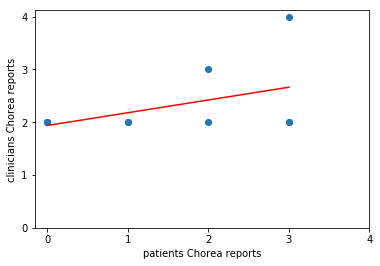

In [20]:
report_per_assess = clinic_df[['assessment_id', 'patient_report_value', 'clinician_report_value']]\
                    .groupby('assessment_id', as_index=False).agg('mean')
print(report_per_assess.head(15))
patients = report_per_assess.patient_report_value
clinicians = report_per_assess.clinician_report_value

coef, p_val = pearsonr(patients, clinicians)
print('\n' 'Correlation of: %.3f \np-value of: %.3f' % (coef, p_val))

plt.scatter(patients, clinicians)
plt.plot(np.unique(patients),
         np.poly1d(np.polyfit(patients, clinicians, 1))(np.unique(patients)),
         color='r')
plt.xticks(range(5))
plt.yticks(range(5))
plt.xlabel('patients Chorea reports')
plt.ylabel('clinicians Chorea reports')
plt.show()

## Patients' lab assessments reports vs. their (mean) home assessments reports:


Correlation of: 0.768 
p-value of: 0.016


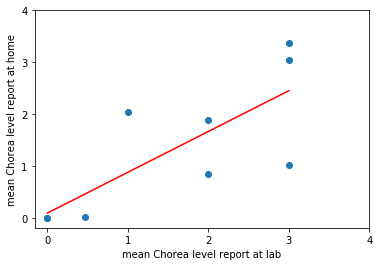

In [18]:
clinic_report_per_user = clinic_df[['user_id', 'patient_report_value']].groupby('user_id').agg('mean')
clinic_report_per_user.columns = ['clinic_mean_report']
clinic_report_per_user.sort_index(inplace=True)

home_report_per_user = home_df[['user_id', 'patient_report_value']].groupby('user_id').agg('mean')
home_report_per_user.columns = ['home_mean_report']
home_report_per_user.sort_index(inplace=True)

both_reports = pd.concat([clinic_report_per_user, home_report_per_user], axis=1)
both_reports.dropna(inplace=True)
both_reports.reset_index(inplace=True)

clinic_mean = both_reports.clinic_mean_report
home_mean = both_reports.home_mean_report

coef, p_val = pearsonr(clinic_mean, home_mean)
print('\n' 'Correlation of: %.3f \np-value of: %.3f' % (coef, p_val))

plt.scatter(clinic_mean, home_mean)
plt.plot(np.unique(clinic_mean),
         np.poly1d(np.polyfit(clinic_mean, home_mean, 1))(np.unique(clinic_mean)),
         color='r')
plt.xticks(range(5))
plt.yticks(range(5))
plt.xlabel('mean Chorea level report at lab')
plt.ylabel('mean Chorea level report at home')
plt.show()

# Raw accelerometer data analysis:

In [21]:
clinic_df['acc_norm'] = np.sqrt((clinic_df.x)**2 + (clinic_df.y)**2 + (clinic_df.z)**2)
home_df['acc_norm'] = np.sqrt((home_df.x)**2 + (home_df.y)**2 + (home_df.z)**2)
reminders_df['acc_norm'] = np.sqrt((reminders_df.x)**2 + (reminders_df.y)**2 + (reminders_df.z)**2)

In [40]:
def mean_acc_box_plot(df, report_column, group_by='assessment_id'):
    mean_acc_df = df[[group_by, 'acc_norm', report_column]]\
                    .groupby(group_by, as_index=False).agg('mean')
    discrete_report_values = c.report_values
    boxes_vals = [np.asarray(mean_acc_df['acc_norm'][mean_acc_df[report_column] == x]) for x in discrete_report_values]
    plt.boxplot(boxes_vals)
    plt.xticks(range(min_val+1, max_val+2), range(5))
    plt.xlabel('reported Chorea')
    plt.ylabel('accelerometer norm mean')
    plt.show()

### Accelerometer norm mean vs. reported Chorea - clinic patients' reports:

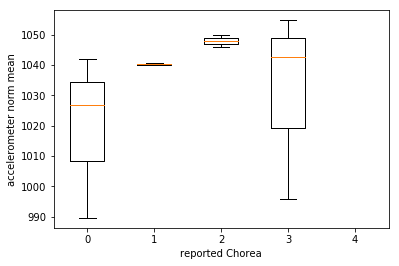

In [42]:
mean_acc_box_plot(clinic_df, 'patient_report_value', group_by='assessment_id')

### Accelerometer norm mean vs. reported Chorea - clinic clinicians' reports:

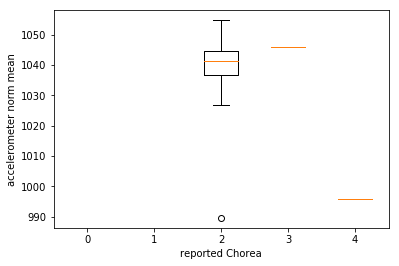

In [43]:
mean_acc_box_plot(clinic_df, 'clinician_report_value', group_by='assessment_id')

### Accelerometer norm mean vs. reported Chorea - home patients' reports:

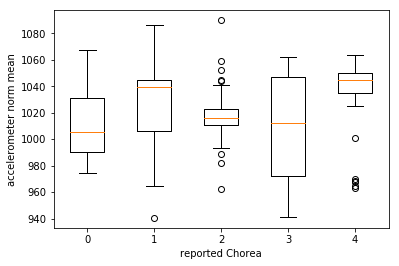

In [44]:
mean_acc_box_plot(home_df, 'patient_report_value', group_by='assessment_id')

### Accelerometer norm mean vs. reported Chorea - reminders patients' reports:

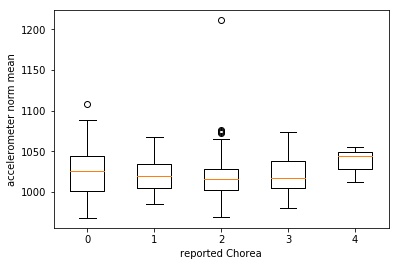

In [45]:
mean_acc_box_plot(reminders_df, 'patient_report_value', group_by='reminder_id')

## REVISIT WHEN STEPS RESOLUTION IS AVAILABLE - Inspect the accelerometer data during home assessments vs. during home pre-reminder 5-minutes segments:

In [103]:
home_energy = home_df.total_energy
reminders_energy = reminders_df.total_energy

In [72]:
print('Mean of energy during home assessments:', round(np.mean(home_energy)/1000, 5), '[g]')
print('Mean of energy during home pre-reminder 5-minutes segments:', round(np.mean(reminders_energy)/1000, 5), '[g]')
t, p = ttest_ind(home_energy, reminders_energy)
print('t-test: %.3f \np-value of: %.3f' % (t, p))

Mean of energy during home assessments: 1.0267 [g]
Mean of energy during home pre-reminder 5-minutes segments: 1.01933 [g]
t-test: 124.582 
p-value of: 0.000


In [101]:
home_energy_per_user = home_df[['user_id', 'total_energy']].groupby('user_id').agg('mean')
home_energy_per_user.columns = ['home_total_energy']
home_energy_per_user.sort_index(inplace=True)
# print('Per-user total energy during home assessments:', '\n\n' ,home_energy_per_user)
reminders_energy_per_user = reminders_df[['user_id', 'total_energy']].groupby('user_id').agg('mean')
reminders_energy_per_user.columns = ['reminders_total_energy']
reminders_energy_per_user.sort_index(inplace=True)
# print('\n\n' 'Per-user total energy during home pre-reminder 5-minutes segments:', '\n\n', reminders_energy_per_user)

In [102]:
both_energies = pd.concat([home_energy_per_user, reminders_energy_per_user], axis=1)
both_energies['assessments minus pre-reminders'] = both_energies.home_total_energy - both_energies.reminders_total_energy
both_energies

,home_total_energy,reminders_total_energy,assessments minus pre-reminders
user_id,,,
8,990.804685,1024.630529,-33.825844
25,1035.290394,NaN,NaN
45,1042.890194,1038.855375,4.034819
51,1040.430134,1042.615525,-2.185391
57,1012.427766,1014.745417,-2.317651
63,981.711292,1008.861375,-27.150083
74,1018.078452,1016.087288,1.991165
82,989.172767,1019.048141,-29.875374
94,1042.084485,1042.323606,-0.239121
